In [1]:
import torch
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# data=np.load("CSI-02-0006/UMA4Rx32Tx5Ms8RB30km.npy")
# new_shape = (21000, 20, 2 * 32 * 4 * 8)
# data = data.reshape(new_shape)

In [30]:
import scipy.io
import numpy as np

# Load the .mat file
file_path = '/Users/rohitviswam/Desktop/IITM Mat file/EV_Rank_1_52_RBs_50_UEs_1000_snaps.mat'
data = scipy.io.loadmat(file_path)

# Inspect the structure of the loaded data
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'EV_re_im_split'])

In [8]:
# Extract the relevant data
EV_data = data['EV_re_im_split']

# Check the shape and structure of the extracted data
print(EV_data.shape)
print(EV_data)

(50, 1000, 832)
[[[ 0.0065606  -0.0152262   0.13096477 ...  0.02899665  0.11794486
    0.25200583]
  [-0.01473732  0.00845132  0.06896454 ...  0.08472115  0.08268961
    0.22304207]
  [-0.05422704  0.06404326 -0.00654457 ...  0.12695812  0.04581619
    0.16514315]
  ...
  [-0.02008673 -0.14001042  0.06337543 ... -0.00231407 -0.10592777
   -0.21425496]
  [ 0.00439956 -0.03413185  0.10111613 ... -0.08517482 -0.10987831
   -0.21231851]
  [-0.04831986 -0.05925934 -0.11068568 ... -0.16147347 -0.08111315
   -0.18327848]]

 [[-0.23827784  0.2376434  -0.06625487 ... -0.03778057  0.02764941
    0.09164511]
  [ 0.22122497 -0.30016141  0.11078326 ...  0.07296581 -0.02914352
   -0.08597792]
  [ 0.11609402 -0.3316893   0.10612199 ...  0.08964571 -0.01920574
   -0.06373712]
  ...
  [ 0.04362871 -0.01683385  0.07379465 ...  0.0160521  -0.16721578
    0.14672768]
  [-0.10985715  0.12080151 -0.00612115 ...  0.096215   -0.12333504
    0.08999272]
  [-0.15891021  0.20262143  0.06144002 ...  0.15320253 -0

In [9]:
data = EV_data

In [10]:
data.shape

(50, 1000, 832)

In [11]:
X = data[:, :-1, :]  # Use all time steps except the last as input
y = data[:, -1, :]   # Use the last time step as the target

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
# Reshape the data for normalization: (num_samples * num_timesteps, num_features)
num_samples, num_timesteps, num_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, num_features)
X_test_reshaped = X_test.reshape(-1, num_features)



In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_normalized = scaler.fit_transform(X_train_reshaped)
X_test_normalized = scaler.transform(X_test_reshaped)



In [14]:
# Reshape the data back to original (21000, 19, 2048)
X_train = X_train_normalized.reshape(num_samples, num_timesteps, num_features)
X_test = X_test_normalized.reshape(X_test.shape[0], num_timesteps, num_features)

In [15]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((40, 999, 832), (10, 999, 832), (40, 832), (10, 832))

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Assuming you have already prepared and split your data into X_train, X_test, y_train, y_test
# and your data is normalized as shown in the previous messages

# Model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(832))  # Assuming you are predicting 2048 features at the next time step

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0182 - val_loss: 0.0184
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0169 - val_loss: 0.0183
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0162 - val_loss: 0.0183
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0157 - val_loss: 0.0182
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0154 - val_loss: 0.0182
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0151 - val_loss: 0.0182
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0149 - val_loss: 0.0182
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0147 - val_loss: 0.0182
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0146 - val_loss: 0.0182
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0144 - val_loss: 0.0182


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Mean Squared Error (MSE): 0.017355442812477844
Root Mean Squared Error (RMSE): 0.1317400577367334
Mean Absolute Error (MAE): 0.11090954786850539


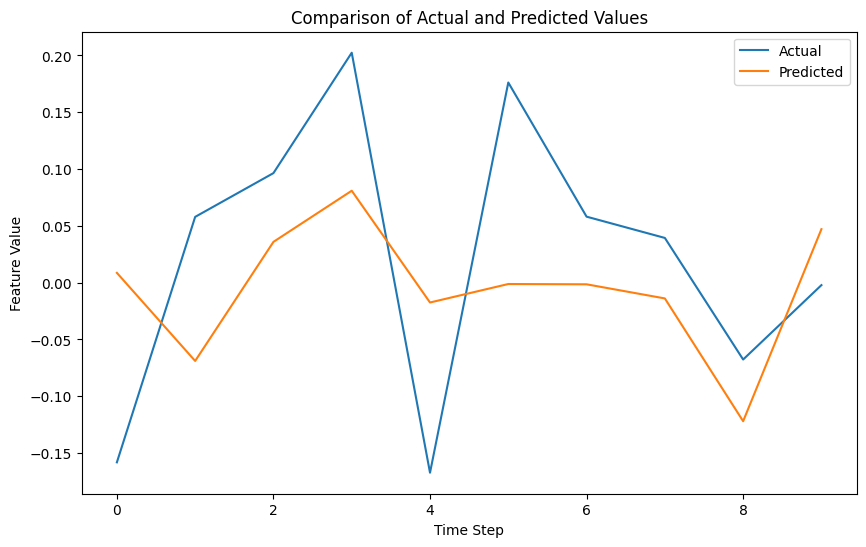

In [27]:
import matplotlib.pyplot as plt

feature=800
# Example: Plotting the actual vs predicted values for the first feature across all time steps in the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100, feature], label='Actual')
plt.plot(predictions[:100, feature], label='Predicted')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


In [28]:
from sklearn.metrics import r2_score

# Calculate R^2 for each feature
r2_scores = [r2_score(y_test[:, i], predictions[:, i]) for i in range(y_test.shape[1])]

# Calculate the mean R^2 score across all features for an overall performance metric
mean_r2_score = np.mean(r2_scores)

print("Mean R^2 Score:", mean_r2_score)


Mean R^2 Score: -0.31194594175914


In [29]:
# Assuming `predictions` are your model's predictions and `y_test` are the actual values

# Calculate the absolute percentage error for each prediction
percentage_errors = np.abs((predictions - y_test) / y_test) * 100

# Define the threshold for an accurate prediction (e.g., error within 10%)
accuracy_threshold = 10  # 10%

# Calculate the percentage of predictions that are within the accuracy threshold
accurate_predictions = np.sum(percentage_errors < accuracy_threshold, axis=1) / y_test.shape[1]
overall_accuracy = np.mean(accurate_predictions) * 100

print(f"Overall 'accuracy': {overall_accuracy:.2f}%")

Overall 'accuracy': 1.94%
